<a href="https://colab.research.google.com/github/Arthurads-rj/portfolio-data-science/blob/main/an%C3%A1lise%20de%20dados%20da%20covid-19%202022/An%C3%A1lise_Covid_19_em_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>Análise Sobre Covid-19 em 2022</h1>
(de 1/1 até 28/2)

O vírus da Covid-19 ainda tem circulado o mundo, com casos novos aparecendo a cada dia. Neste projeto, estarei examinando os dados disponibilizados pelo governo em https://covid.saude.gov.br.


## Objetivos

- Tratamento dos dados
- Análise exploratória
- Plotagem de gráficos


## Importação dos dados

irei utilizar os dados que o governo providenciou sobre o Covid-19 que foram registrados desde o começo do ano de 2022 até o dia 28 de Fevereiro e também importarei as bibliotecas necessárias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dados = '../content/drive/MyDrive/Planilhas/covid 19/HIST_PAINEL_COVIDBR_2022_Parte1_28fev2022.csv'

covid = pd.read_csv(dados, sep=';')

covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0,NaN


## Análise Inicial

De começo, irei verificar quais são as colunas que existem no dataset e quais os tipos de cada coluna.

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331523 entries, 0 to 331522
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   regiao                  331523 non-null  object 
 1   estado                  331462 non-null  object 
 2   municipio               328630 non-null  object 
 3   coduf                   331523 non-null  int64  
 4   codmun                  329869 non-null  float64
 5   codRegiaoSaude          328630 non-null  float64
 6   nomeRegiaoSaude         328630 non-null  object 
 7   data                    331523 non-null  object 
 8   semanaEpi               331523 non-null  int64  
 9   populacaoTCU2019        330284 non-null  float64
 10  casosAcumulado          331523 non-null  float64
 11  casosNovos              331523 non-null  int64  
 12  obitosAcumulado         331523 non-null  int64  
 13  obitosNovos             331523 non-null  int64  
 14  Recuperadosnovos    

A maioria das colunas são apenas objects e de numeros inteiros, então não precisa de muita formatação. 
Em várias colunas estão faltando alguns dados. Vamos analisar usando o `describe()`

In [4]:
covid.describe()

,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,331523.000000,329869.000000,328630.000000,331523.000000,3.302840e+05,3.315230e+05,331523.000000,331523.000000,331523.000000,6.100000e+01,6.100000e+01,328630.000000
mean,32.360648,325258.014130,32403.123698,5.457642,1.138909e+05,1.370212e+04,58.820344,340.366113,0.273981,2.308167e+07,1.731538e+06,0.069300
std,9.873863,98535.173555,9836.356272,6.556972,2.980465e+06,3.595949e+05,1828.198068,9006.433724,9.213596,1.663606e+06,1.073087e+06,0.253964
min,11.000000,110000.000000,11001.000000,1.000000,7.810000e+02,0.000000e+00,-8388.000000,0.000000,-59.000000,2.158167e+07,9.073400e+04,0.000000
25%,25.000000,251200.000000,25010.000000,3.000000,5.474000e+03,5.520000e+02,0.000000,10.000000,0.000000,2.171083e+07,7.106700e+05,0.000000
50%,31.000000,314610.000000,31059.000000,5.000000,1.169500e+04,1.174000e+03,0.000000,22.000000,0.000000,2.219644e+07,2.012626e+06,0.000000
75%,41.000000,411915.000000,41015.000000,7.000000,2.576200e+04,2.937000e+03,9.000000,57.000000,0.000000,2.425253e+07,2.638781e+06,0.000000
max,76.000000,530010.000000,53001.000000,52.000000,2.101471e+08,2.878762e+07,298408.000000,649333.000000,1308.000000,2.696635e+07,3.182910e+06,1.000000


E vamos ver as porcentagens de dados faltando.

In [5]:
(covid.isnull().sum() / covid.shape[0]).sort_values(ascending=False)

emAcompanhamentoNovos     0.999816
Recuperadosnovos          0.999816
interior/metropolitana    0.008726
municipio                 0.008726
codRegiaoSaude            0.008726
nomeRegiaoSaude           0.008726
codmun                    0.004989
populacaoTCU2019          0.003737
estado                    0.000184
obitosAcumulado           0.000000
obitosNovos               0.000000
regiao                    0.000000
casosNovos                0.000000
casosAcumulado            0.000000
data                      0.000000
coduf                     0.000000
semanaEpi                 0.000000
dtype: float64

### Tratamento de Dados
Temos alguns problemas aqui:
- Tanto a coluna de acompanhamentos quanto de novos registros de recuperados tem uma taxa de 99% de dados faltando.
- município, codigo e nome de região de saude tem uma perda de 0,008%
- população tem 0,003% faltando.

Maioria desses dados perdidos tornam as linhas inuteis, então devemos remover esses dados. Mas antes vamos ver qual o problema na coluna "populaçãoTCU2019".

In [6]:
covid[covid['populacaoTCU2019'].isna()]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1654,Norte,RO,NaN,11,110000.0,NaN,NaN,2022-01-01,52,NaN,1395.0,0,31,0,NaN,NaN,NaN
1655,Norte,RO,NaN,11,110000.0,NaN,NaN,2022-01-02,1,NaN,1395.0,0,31,0,NaN,NaN,NaN
1656,Norte,RO,NaN,11,110000.0,NaN,NaN,2022-01-03,1,NaN,1395.0,0,31,0,NaN,NaN,NaN
1657,Norte,RO,NaN,11,110000.0,NaN,NaN,2022-01-04,1,NaN,1395.0,0,31,0,NaN,NaN,NaN
1658,Norte,RO,NaN,11,110000.0,NaN,NaN,2022-01-05,1,NaN,0.0,-1395,0,-31,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316945,Centro-Oeste,GO,NaN,52,520000.0,NaN,NaN,2022-02-24,8,NaN,0.0,0,0,0,NaN,NaN,NaN
316946,Centro-Oeste,GO,NaN,52,520000.0,NaN,NaN,2022-02-25,8,NaN,0.0,0,0,0,NaN,NaN,NaN
316947,Centro-Oeste,GO,NaN,52,520000.0,NaN,NaN,2022-02-26,8,NaN,0.0,0,0,0,NaN,NaN,NaN
316948,Centro-Oeste,GO,NaN,52,520000.0,NaN,NaN,2022-02-27,9,NaN,0.0,0,0,0,NaN,NaN,NaN


Há varios problemas aqui. Não existem valores para a coluna de população e nem na coluna de casos acumulados. Este conjunto de dados é inútil para a análise, então é melhor remover do dataset.

In [7]:
covid.dropna(axis=0, subset=['populacaoTCU2019'], inplace=True)

In [8]:
print(covid.shape)
print(covid.isnull().sum())

(330284, 17)
regiao                         0
estado                        61
municipio                   1654
coduf                          0
codmun                      1654
codRegiaoSaude              1654
nomeRegiaoSaude             1654
data                           0
semanaEpi                      0
populacaoTCU2019               0
casosAcumulado                 0
casosNovos                     0
obitosAcumulado                0
obitosNovos                    0
Recuperadosnovos          330223
emAcompanhamentoNovos     330223
interior/metropolitana      1654
dtype: int64


E em seguida, checar para ver como está o resumo dos dados faltando.

In [9]:
(covid.isnull().sum() / covid.shape[0]).sort_values(ascending=False)

emAcompanhamentoNovos     0.999815
Recuperadosnovos          0.999815
interior/metropolitana    0.005008
municipio                 0.005008
codmun                    0.005008
codRegiaoSaude            0.005008
nomeRegiaoSaude           0.005008
estado                    0.000185
casosNovos                0.000000
obitosNovos               0.000000
obitosAcumulado           0.000000
regiao                    0.000000
casosAcumulado            0.000000
populacaoTCU2019          0.000000
data                      0.000000
coduf                     0.000000
semanaEpi                 0.000000
dtype: float64

### Organização dos dados
Dividi os dados pois estão organizados da seguinte forma:
- Uma parte dos dados estão diretamente relacionada as regiões do Brasil de maneira generalizada, por exemplo, falando do Sudeste como um todo.
- Outra parte dos dados são relacionados aos Estados e seus Municípios.

Os dados estão divididos de maneira respectiva a ordem dita acima.

feita essa divisão, pude começar a analisar os dados.

In [10]:
covid_regioes = covid[covid['municipio'].isna()]
covid_regioes

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-01,52,210147125.0,22291507.0,3986,619105,49,21581668.0,90734.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-02,1,210147125.0,22293228.0,1721,619133,28,21581717.0,92378.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-03,1,210147125.0,22305078.0,11850,619209,76,21591847.0,94022.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-04,1,210147125.0,22323837.0,18759,619384,175,21603954.0,100499.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2022-01-05,1,210147125.0,22351104.0,27267,619513,129,21615473.0,116118.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2022-02-24,8,3015268.0,679912.0,1409,11398,6,NaN,NaN,NaN
1650,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2022-02-25,8,3015268.0,680841.0,929,11409,11,NaN,NaN,NaN
1651,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2022-02-26,8,3015268.0,680841.0,0,11409,0,NaN,NaN,NaN
1652,Centro-Oeste,DF,NaN,53,NaN,NaN,NaN,2022-02-27,9,3015268.0,680841.0,0,11409,0,NaN,NaN,NaN


In [11]:
covid_estados = covid[covid['municipio'].notnull()]
covid_estados

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1713,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2022-01-01,52,22945.0,4668.0,0,72,0,NaN,NaN,0.0
1714,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2022-01-02,1,22945.0,4680.0,12,72,0,NaN,NaN,0.0
1715,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2022-01-03,1,22945.0,4685.0,5,73,1,NaN,NaN,0.0
1716,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2022-01-04,1,22945.0,4703.0,18,73,0,NaN,NaN,0.0
1717,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2022-01-05,1,22945.0,4721.0,18,73,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331518,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-02-24,8,3015268.0,679912.0,1409,11398,6,NaN,NaN,1.0
331519,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-02-25,8,3015268.0,680841.0,929,11409,11,NaN,NaN,1.0
331520,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-02-26,8,3015268.0,680841.0,0,11409,0,NaN,NaN,1.0
331521,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-02-27,9,3015268.0,680841.0,0,11409,0,NaN,NaN,1.0


## Análise Exploratória

Antes da análise exploratória começar de fato, é sempre bom fazer perguntas aos dados paraa conseguir extrair informações deles. 

In [12]:
#função para eu conseguir selecionar adequadamente as colunas da tabela criada
#pelo pd.groupby()
def nomeColunas(nome):
  nome.columns = ['_'.join(col).strip() for col in nome.columns.values]

### Número de Casos e Óbitos dos Estados
Uma pergunta relevante seria:
**Quais são os Estados do Brasil que tiveram a maior quantidade de casos e Óbitos confirmados?**

Depois de organizar os dados, fiz uma série de agrupamentos que poderiam trazer uma resposta a essa pergunta.

O primeiro agrupamento feito foi para somar todos os casos e óbitos e mostrar o maior número de casos registrados em um dia por aquele Estado.

In [13]:
estados_contagem = covid_estados.groupby('estado')['casosNovos', 'obitosNovos'].agg(['sum', 'max'])
nomeColunas(estados_contagem)
estados_contagem = estados_contagem.sort_values(by='casosNovos_sum', ascending=False)
estados_contagem

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,casosNovos_sum,casosNovos_max,obitosNovos_sum,obitosNovos_max
estado,,,,
MG,975509,21013,2969,29
PR,728565,2184,1412,38
RS,648799,2875,1828,18
RJ,642854,23095,2311,75
SP,561345,3766,9327,133
ES,389080,4399,789,7
SC,371538,3487,1182,8
CE,264070,22009,1499,59
BA,226999,2875,1648,40


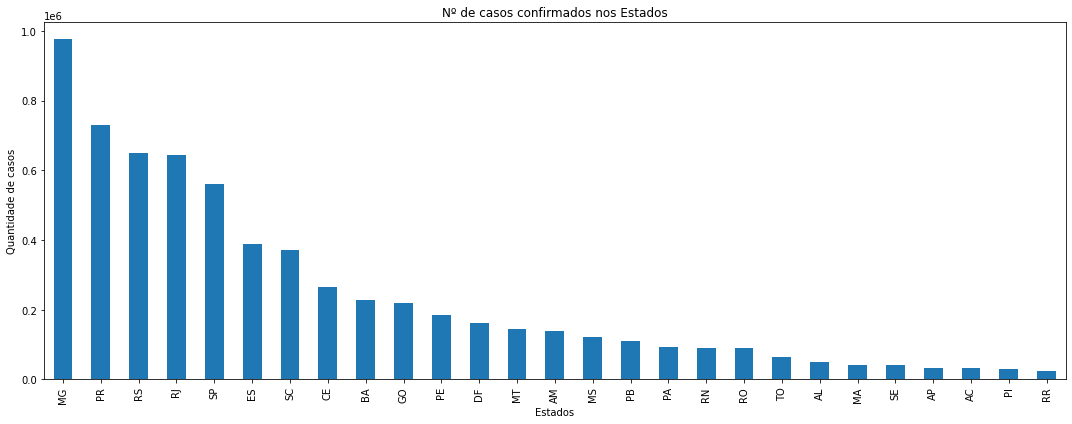

In [14]:
fig, ax = plt.subplots(figsize=(15,6))

estados_contagem['casosNovos_sum'].plot(kind='bar', ax=ax)
ax.set_title('Nº de casos confirmados nos Estados')
ax.set_ylabel('Quantidade de casos')
ax.set_xlabel('Estados')
plt.tight_layout()

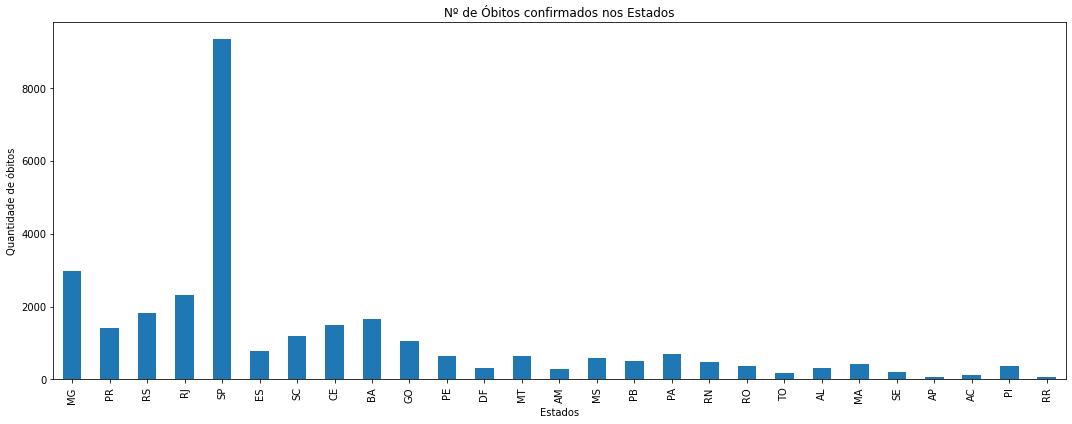

In [15]:
fig, ax = plt.subplots(figsize=(15,6))

estados_contagem['obitosNovos_sum'].plot(kind='bar', ax=ax)
ax.set_title('Nº de Óbitos confirmados nos Estados')
ax.set_ylabel('Quantidade de óbitos')
ax.set_xlabel('Estados')
plt.tight_layout()

Minas Gerais foi o Estado que mais teve casos de todos os outros, com quase 1 milhão de casos enquanto São Paulo teve mais óbitos, cerca de 9000, que os outros. Vamos nos aprofundar em Minas Gerais primeiro e ver os dados.

### Examinando Minas Gerais

Primeiro vamos separar Minas Gerais do dataset e filtrar os Municípios que contém mais de 9000 casos

In [51]:
mg = covid_estados.loc[covid_estados['estado']=='MG']
mg_agrup = mg.groupby('municipio')['casosNovos','interior/metropolitana'].sum()
mg_agrup_filt = mg_agrup[mg_agrup['casosNovos'] > 3000]
mg_agrup_filt = mg_agrup_filt.astype({'interior/metropolitana':'bool'})
mg_agrup_filt = mg_agrup_filt.rename(columns={'interior/metropolitana': 'Metropolitana'})
mg_agrup_filt = mg_agrup_filt.sort_values(by='casosNovos', ascending=False)
mg_agrup_filt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,casosNovos,Metropolitana
municipio,,
Uberlândia,65860,False
Belo Horizonte,45155,True
Uberaba,32846,False
Montes Claros,26548,False
Contagem,17535,True
...,...,...
Três Pontas,3245,False
Piumhi,3220,False
Cambuí,3172,False


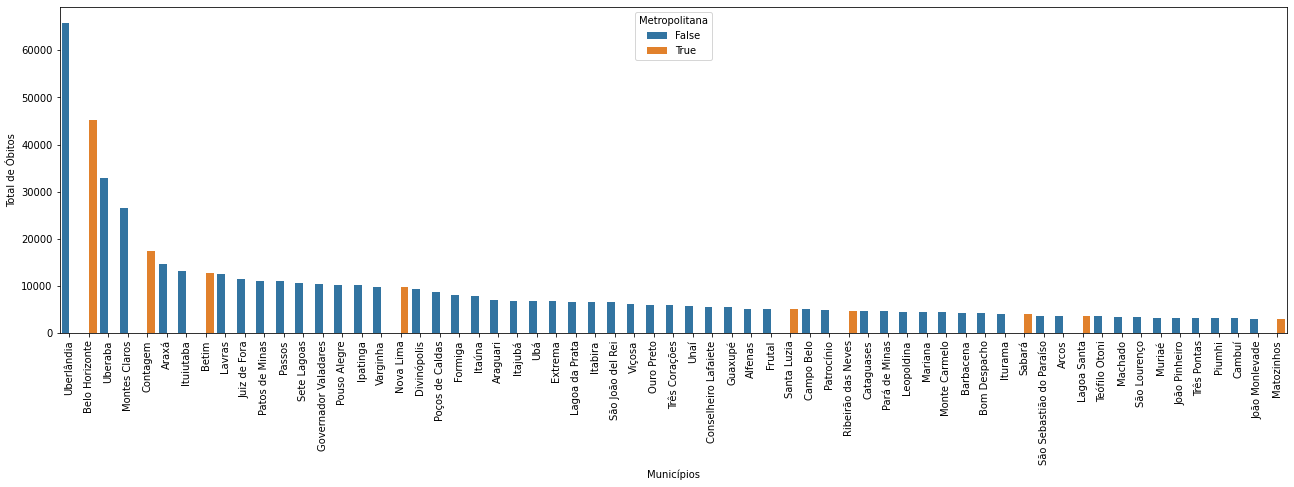

In [69]:
plt.figure(figsize=(22,6))
ax = sns.barplot(data=mg_agrup_filt, x=mg_agrup_filt.index, y='casosNovos', hue='Metropolitana')
ax.set(xlabel='Municípios', ylabel='Total de Casos')
plt.xticks(rotation=90)
plt.show()

Uberlândia e Belo Horizonte são dois grandes municípios de Minas Gerais, onde o primeiro tem uma das maiores concentrações populacionais do Estado, já o segundo é a capital do Estado. Possivelmente é por isso sua grande quantidade de casos.

In [18]:
mg_u_pop = mg.loc[mg['municipio'] == 'Uberlândia']
mg_u_pop = mg_u_pop[:1]
mg_u_pop = mg_u_pop.populacaoTCU2019.iloc[0]
mg_u_pop

691305.0

In [19]:
mg_casos = mg_agrup_filt['casosNovos']
(mg_casos.iloc[0] / mg_u_pop)

0.09526909251343474

Os casos em Uberlândia correspondem a 0,095% da população.

Vamos ver com ficam a porcentagem em Belo Horizonte

In [20]:
mg_b_pop = mg.loc[mg['municipio'] == 'Belo Horizonte']
mg_b_pop = mg_b_pop[:1]
mg_b_pop = mg_b_pop.populacaoTCU2019.iloc[0]
mg_b_pop

2512070.0

In [21]:
(mg_casos.iloc[1] / mg_u_pop)

0.06531849183790078

Os casos em Belo Horizonte Correspondem a 0,065% da população.

### Examinando São Paulo
Agora, vamos ver o porque que São Paulo tem um pico de óbitos. Mesmo tendo uma baixa incidência de óbitos no país todo por conta das vacinações, o gráfico exibia um pico um tanto quanto discrepante.

In [36]:
sp = covid_estados.loc[covid_estados['estado']=='SP']
sp_agrup = sp.groupby('municipio')['obitosNovos', 'interior/metropolitana'].sum().sort_values(by='obitosNovos', ascending=False)
sp_agrup_filt = sp_agrup[sp_agrup['obitosNovos'] > 100]
sp_agrup_filt = sp_agrup_filt.astype({'interior/metropolitana':'bool'})
sp_agrup_filt = sp_agrup_filt.rename(columns={'interior/metropolitana': 'Metropolitana'})
sp_agrup_filt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,obitosNovos,Metropolitana
municipio,,
São Paulo,1903,True
Campinas,303,True
Guarulhos,272,True
Ribeirão Preto,227,False
Sorocaba,211,False
São José dos Campos,196,False
Osasco,191,True
São Bernardo do Campo,189,True
Santos,174,False


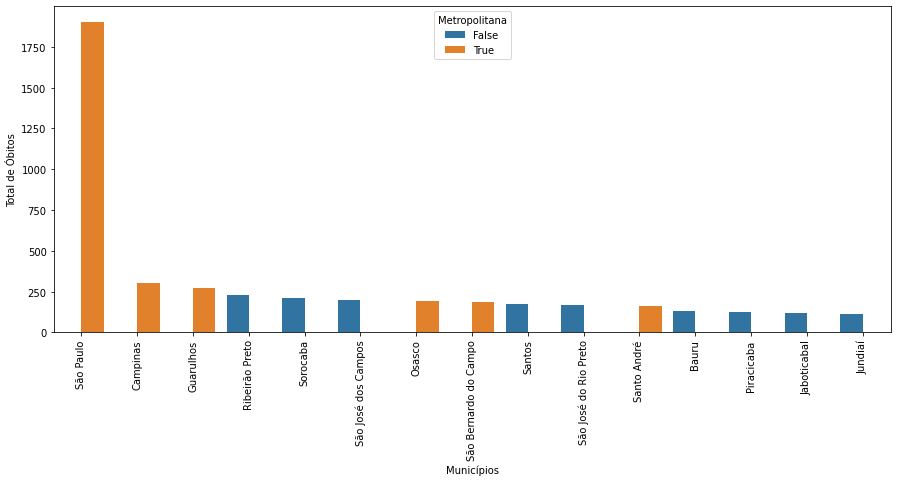

In [68]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=sp_agrup_filt, x=sp_agrup_filt.index, y='obitosNovos', hue='Metropolitana')
ax.set(xlabel='Municípios', ylabel='Total de Óbitos')
plt.xticks(rotation=90)
plt.show()

Vamos ver qual a população da Capital de São Paulo

In [25]:
sp_pop = sp.loc[sp['municipio'] == 'São Paulo']
sp_pop = sp_pop['populacaoTCU2019']
sp_pop = sp_pop.iloc[0]
sp_pop

12252023.0

In [26]:
sp_obitos = sp_agrup_filt['obitosNovos'][:1]
sp_obitos.iloc[0]
(sp_obitos / sp_pop)

municipio
São Paulo    0.000155
Name: obitosNovos, dtype: float64

Os óbitos equivalem a 0,00015% da população total de São Paulo.

A capital de São Paulo é um dos maiores municípios do Estado, tendo mais de 12 mil de habitantes, o que significa que existe uma enorme movimentação de pessoas por lá constantemente. Para existir esse pico de óbitos, possivelmente é algo relacionado a proporção de população, afinal, os outros municípios tem uma proximidade na quantidade de óbitos.

### Voltando aos Estados
Abaixo, são o quantos casos e óbitos foram registrados desde o primeiro dia do ano até o dia 28 de Fevereiro. Esse seria mais um resumo mostrando o número de casos por Estado.

In [27]:
estados_frequencia = covid_estados.groupby('estado')['casosNovos', 'obitosNovos'].nunique().sort_values(by=['casosNovos', 'obitosNovos'],ascending=False)
estados_frequencia


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,casosNovos,obitosNovos
estado,,
MG,701,25
PR,603,23
SP,546,51
RS,533,16
ES,519,9
RJ,435,39
SC,429,11
CE,410,41
GO,362,20


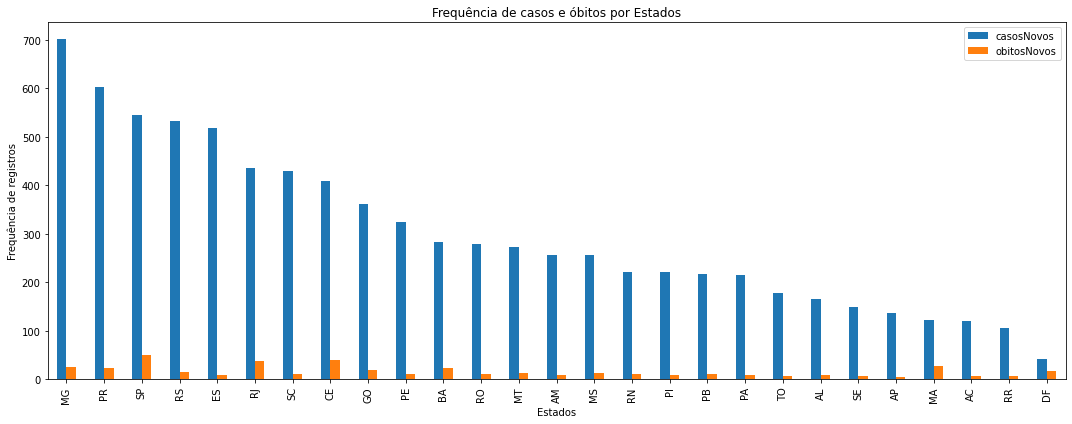

In [67]:
fig, ax = plt.subplots(figsize=(15,6))

estados_frequencia.plot(kind='bar', ax=ax)
ax.set_title('Frequência de casos e óbitos por Estados')
ax.set_ylabel('Frequência de registros')
ax.set_xlabel('Estados')
plt.tight_layout()

Vemos uma versão compacta dos dados, mostrando a proporção de casos e óbitos dentro do país sem mostrar números reais.

### Visão Geral das Regiões do Brasil
A seguir, temos uma contagem de todos os casos e óbitos agrupados por região, contando com a soma de todos os casos no Brasil no ano.

In [29]:
brasil_contagem = covid_regioes.groupby('regiao')['casosNovos', 'obitosNovos'].agg(['sum', 'max'])
nomeColunas(brasil_contagem)
brasil_contagem

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,casosNovos_sum,casosNovos_max,obitosNovos_sum,obitosNovos_max
regiao,,,,
Brasil,6500099,298408,30277,1308
Centro-Oeste,647728,17356,2609,74
Nordeste,1052165,42547,6065,118
Norte,475062,8319,1751,72
Sudeste,2572154,69223,15424,664
Sul,1752990,45154,4428,105


Outra pergunta relevante é: **Qual é o percentual da população do Brasil que foi infectado?**

Isolei a soma de todos os casos e óbitos no Brasil para ter uma reposta.

In [30]:
brasil_apenas = brasil_contagem[:1]
brasil_apenas

,casosNovos_sum,casosNovos_max,obitosNovos_sum,obitosNovos_max
regiao,,,,
Brasil,6500099,298408,30277,1308


E a resposta para a pergunta é: 0,03% da população total do Brasil foi infectada.

In [31]:
brasil_populacao = covid_regioes.loc[covid_regioes['regiao'] == 'Brasil']
brasil_populacao = brasil_populacao['populacaoTCU2019']
(brasil_apenas['casosNovos_sum'] / brasil_populacao[0])

regiao
Brasil    0.030931
Name: casosNovos_sum, dtype: float64

Essa contagem é para os gráficos, pois o número de casos contando com o Brasil todo atrapalharia a leitura dos gráficos.

In [32]:
regioes_contagem = brasil_contagem[1:]
regioes_contagem

,casosNovos_sum,casosNovos_max,obitosNovos_sum,obitosNovos_max
regiao,,,,
Centro-Oeste,647728,17356,2609,74
Nordeste,1052165,42547,6065,118
Norte,475062,8319,1751,72
Sudeste,2572154,69223,15424,664
Sul,1752990,45154,4428,105


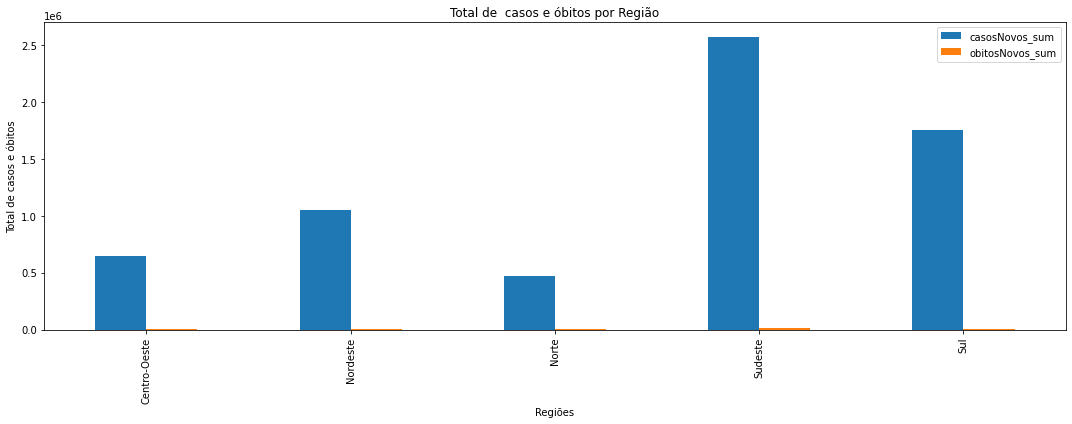

In [70]:
fig, ax = plt.subplots(figsize=(15,6))

regioes_contagem[['casosNovos_sum', 'obitosNovos_sum']].plot(kind='bar', ax=ax)
ax.set_title('Total de  casos e óbitos por Região')
ax.set_ylabel('Total de casos e óbitos')
ax.set_xlabel('Regiões')
plt.tight_layout()

O Sudeste teve o foco de todos os casos e óbitos, tendo em mente que vimos que Minas Gerais estavam com a maior contagem de casos confirmados e São Paulo com a maior quantidade de óbitos confirmados.

### Linha do tempo de Casos e Óbitos confirmados
Aqui seria a evolução dos casos ao longo do ano.

In [34]:
evoluçao = covid_estados.groupby('data')['casosNovos', 'obitosNovos'].sum()
evoluçao.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,casosNovos,obitosNovos
data,,
2022-01-01,3951,49
2022-01-02,1681,28
2022-01-03,11799,75
2022-01-04,18594,175
2022-01-05,28382,161


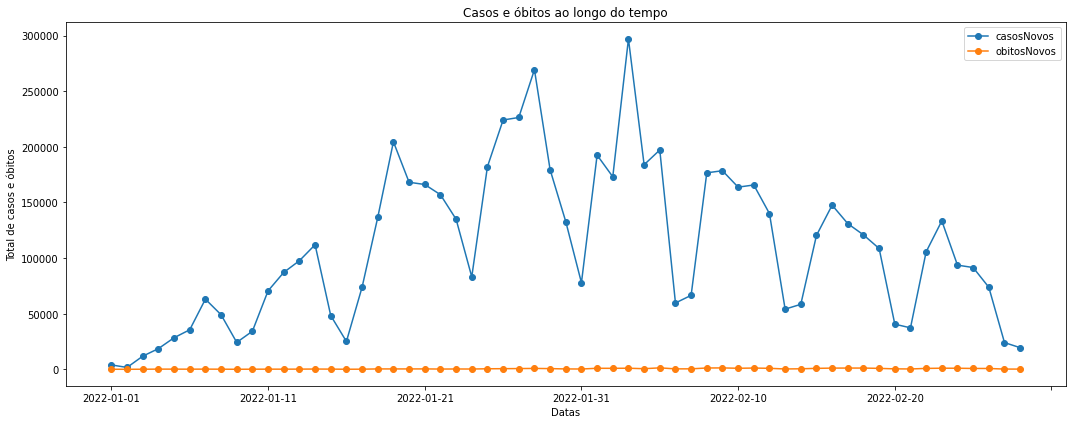

In [73]:
fig, ax = plt.subplots(figsize=(15,6))

evoluçao.plot(kind='line', marker='o', ax=ax)
ax.set_title('Casos e óbitos ao longo do tempo')
ax.set_ylabel('Total de casos e óbitos')
ax.set_xlabel('Datas')
plt.tight_layout()

Existe um período de incubação do vírus que é por volta de 5 dias, com intervalos de até 12 dias. Próximo do fim do ano, temos o Natal, que as pessoas tendem a se reunir. Além das reuniões, a movimentação comercial fica muito alta, com pessoas indo em shoppings e centros comerciais para comprar presentes e alimentos para o Natal, o que faz sugerir esse pico nos casos no começo do ano.

As férias e essa época de verão que está presente no começo do ano também sustenta a alta movimentação de pessoas, fazendo com que a doença se espalhe rápido.

## Hipóteses e Conclusões

- Existe uma discrepância enorme entre casos confirmados e óbitos. Isso se dá por conta das campanhas de vacinação, que tornaram a população do Brasil bem mais imune a doença.
- O Sudeste, sendo uma região mais comercial do Brasil, é a área que mais tem acúmulo de casos, e em seguida o Sul.
- Ainda existem muitas ondas e picos de caso no Brasil por conta das datas festivas e a maneira como as pessoas escolhem comemorar, o que sugere que é algo relacionado a flexibilização da quarentena.

Mesmo com campanhas de vacinação e com a população mais imunizada, ainda é preciso ter cuidado, pois mesmo sendo poucos óbitos, ainda acontecem, e para evitar que aonteçam mais é preciso evitar aglomerações para não passar o vírus adiante.